# Stock Market Analysis

A Time Series analysis and Visualization of Stock Market Data

By Ivan Li

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [7]:
# Load Dataset

df = pd.read_csv("stock_data.csv", 
				parse_dates=True, 
				index_col="Date")

# Display first 5 rows

df.head()


,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [8]:
# Clean Unnamed Column

df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


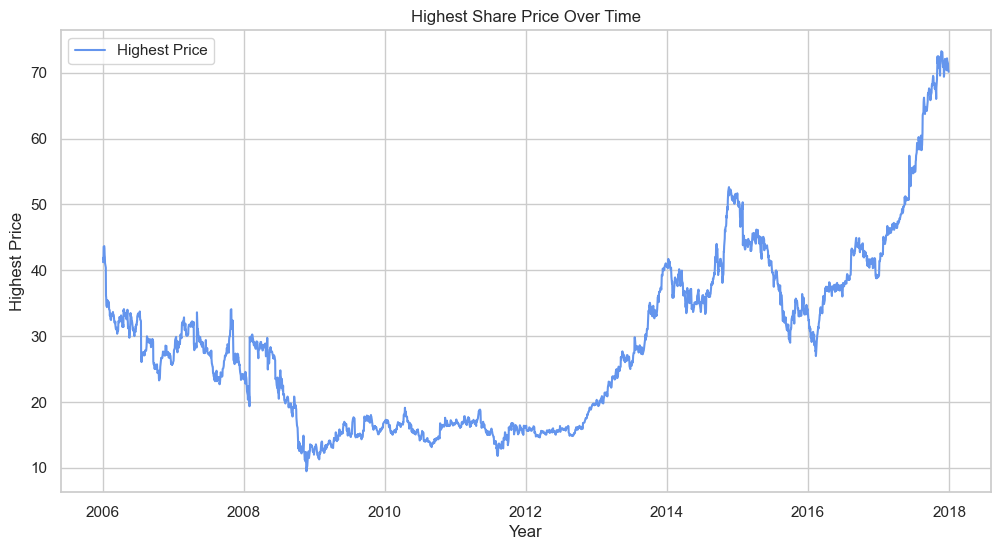

In [13]:
sns.set(style="whitegrid") 

# Plot Highest Price of Share Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='High', label='Highest Price', color='cornflowerblue')


plt.xlabel('Year')
plt.ylabel('Highest Price')
plt.title('Highest Share Price Over Time')

plt.show()

C:\Users\ivani\AppData\Local\Temp\ipykernel_9336\2999159430.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean()


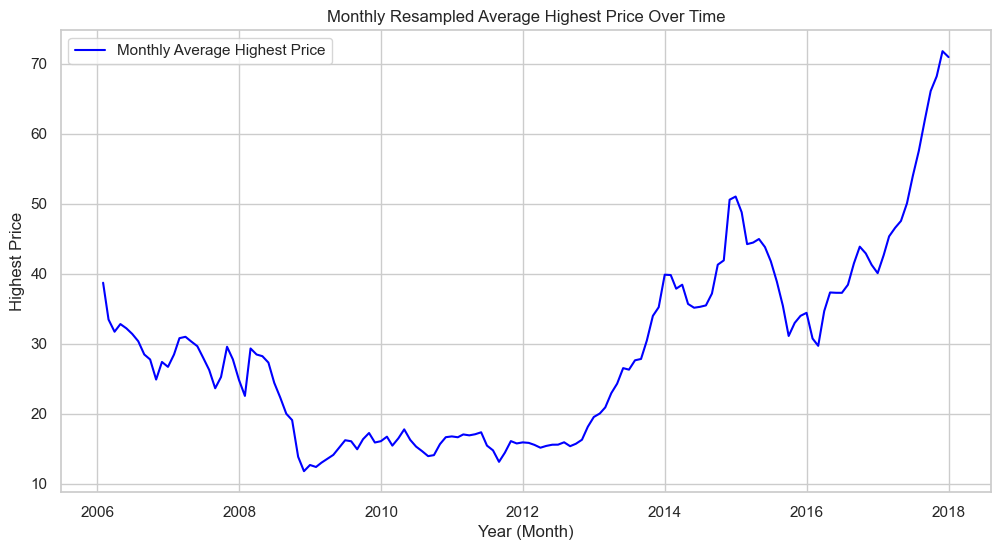

In [19]:
sns.set(style="whitegrid")

# Resample as a monthly frequency, with the mean

df_resampled = df.resample('M').mean() 

# Year renamed as Month

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Monthly Average Highest Price', color='blue')

# Adding labels and title
plt.xlabel('Year (Month)')
plt.ylabel('Highest Price')
plt.title('Monthly Resampled Average Highest Price Over Time')

plt.show()


<Figure size 1200x600 with 0 Axes>

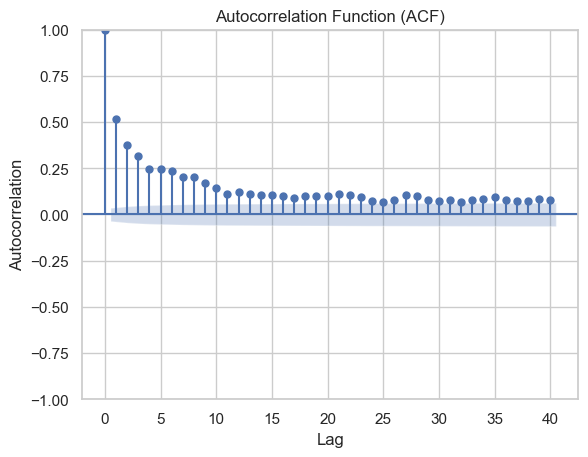

In [30]:
# Plot Autocorrelation Function Graph

df = pd.read_csv("stock_data.csv", parse_dates=['Date'], index_col='Date')
plt.figure(figsize=(12, 6))

# Choose 40 lag
plot_acf(df['Volume'], lags=40)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [31]:
# Perform ADF test for stationarity

result = adfuller(df['High'])
print('ADF:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF: 0.7671404880535936
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


Notice that the ADF value is greater than every critical value at the 1, 5 and 10 percent level. So, fail to reject the null hypothesis, and the data does not appear to be stationary.

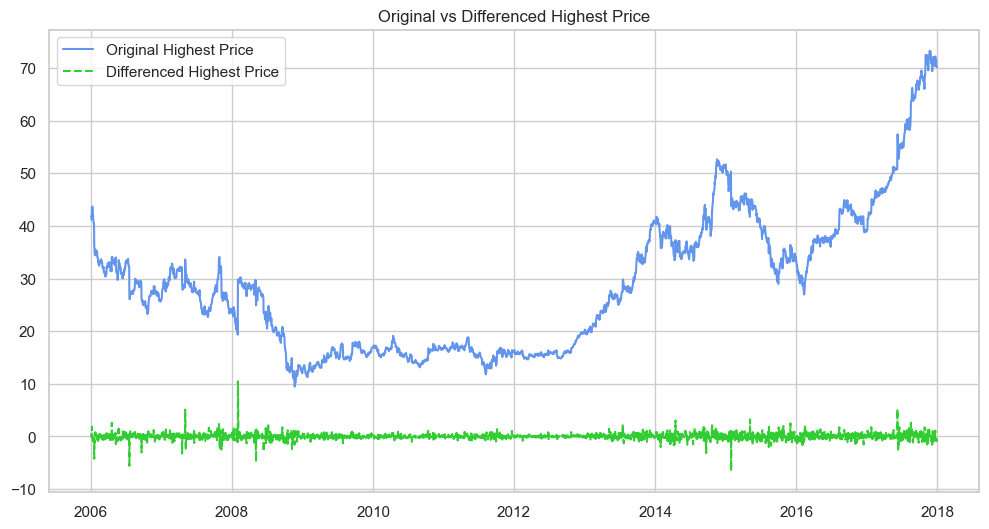

In [33]:
# Smoothen the data with differencing and moving average
df['high_diff'] = df['High'].diff()

# Compare to Original Highest Price Plot
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original Highest Price', color='cornflowerblue')
plt.plot(df['high_diff'], label='Differenced Highest Price', linestyle='--', color='limegreen')
plt.legend()
plt.title('Original vs Differenced Highest Price')
plt.show()

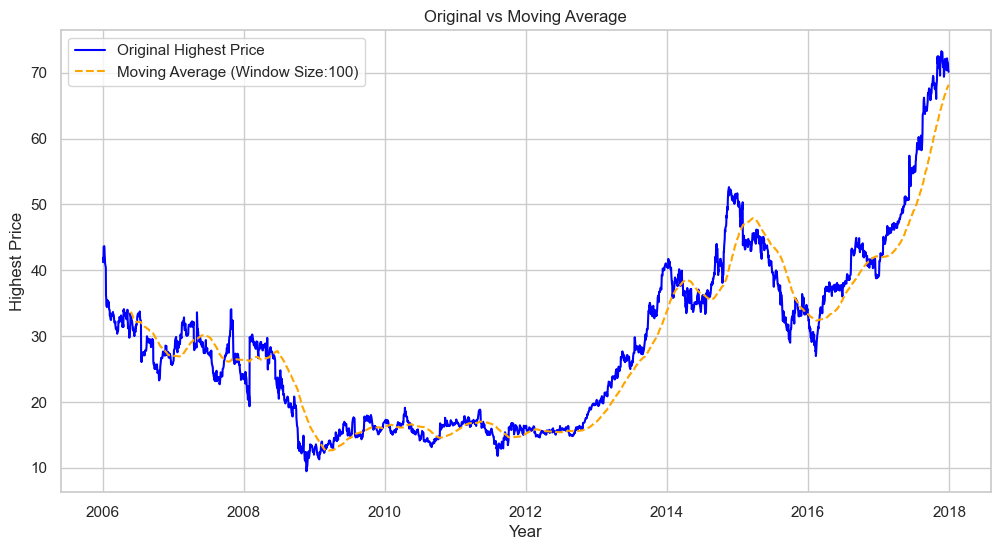

In [37]:
# Plot Moving Average
# Choose window size 100
window_size = 100
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Compare to Original Highest Price
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original Highest Price', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window Size:{window_size})', linestyle='--', color='orange')

plt.xlabel('Year')
plt.ylabel('Highest Price')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

# Conduct ADF test for stationarity

In [41]:
# Compare the Original and Differenced Data
df_comparison = pd.concat([df['High'], df['high_diff']], axis=1)

# Display head
print(df_comparison.head())


             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [42]:
# Clean NA values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64

In [44]:
# Perform ADF test for stationarity
result = adfuller(df['high_diff'])
print('ADF:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF: -12.14836747834328
p-value: 1.5912766134146188e-22
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


Notice that the ADF value is lower than than every critical value at the 1, 5 and 10 percent level. So, reject the null hypothesis. 

The data appears to be stationary according to the Augmented Dickey-Fuller test.

Differencing and other transformations may be necessary to achieve stationarity such that certain time series models may be applied.